In [ ]:
#rating accuracy

In [1]:
import csv
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

data = pd.read_csv('reviews_sentiment.csv')
data = pd.DataFrame(data).fillna(0)
data['rating'] = data['rating'].astype(int)

stemmer = SnowballStemmer('english')
words = stopwords.words("english")

data['cleaned'] = data['review_desc'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

X_train, X_test, y_train, y_test = train_test_split(data['cleaned'], data.rating, test_size=0.2)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k='all')),
                     ('clf', LinearSVC(C=1.0, penalty='l1', max_iter=3000, dual=False))])


model = pipeline.fit(X_train, y_train)

vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['clf']

feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)

target_names = ['3.0', '3.5', '4.0', '4.5', '5.0']
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

print("accuracy score: " + str(model.score(X_test, y_test)))

top 10 keywords per class:
3.0: coupl bad order lost outsid waiter fine view cook ok lunchtim place look astronom owe scenic view ju kung
3.5: monkey cage restaur aw came bowl deal seafood ncc brought driver chanc want order stapl fonzu munduk
4.0: wendi reason time brata bustl jakarta firefli restaur endang ubud green pingoo comment tropic visno
4.5: sub feast borobudur gula bali tri white notic place park mall cheaper price good ramen tri spici
5.0: huski yogyakarta kitchen sate ratu oneeighti sedasa palla kumbuh asuka quinc madu mani
accuracy score: 0.724877927409573


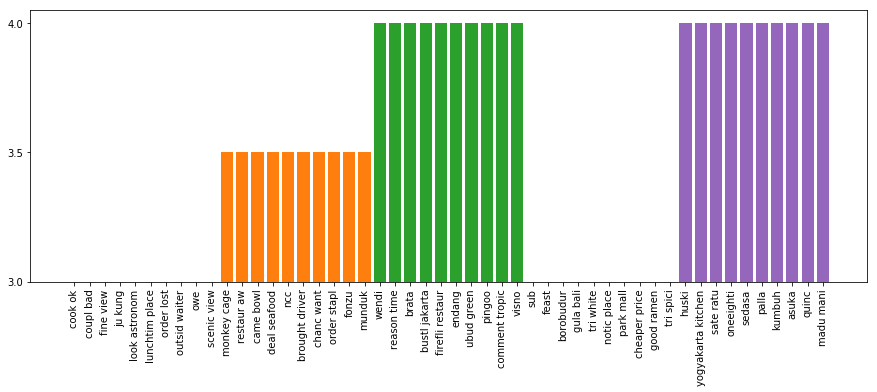

In [5]:
# create plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    plt.bar((feature_names[top10]), label)
    plt.xticks(rotation=90)

In [14]:
#predict model based on rating 
print(model.predict(['Perfect balance of spices, sweetness, and heat.']))

[4]


In [ ]:
#sentiment_value accuracy

In [68]:
import csv
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

data = pd.read_csv('reviews_sentiment.csv')
#data = pd.DataFrame(data).fillna(0)
data['SENTIMENT_VALUE'] = data['SENTIMENT_VALUE'].astype(int)

stemmer = SnowballStemmer('english')
words = stopwords.words("english")

data['cleaned'] = data['review_desc'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

X_train, X_test, y_train, y_test = train_test_split(data['cleaned'], data.SENTIMENT_VALUE, test_size=0.2)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k='all')),
                     ('clf', LinearSVC(C=1, penalty='l1', max_iter=3000, dual=False))])


model = pipeline.fit(X_train, y_train)

vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['clf']

feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)

target_names = ['1', '2', '3', '4', '5']
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

print("accuracy score: " + str(model.score(X_test, y_test)))

top 10 keywords per class:
1: disast poison devast nasti hell fu pathet smell bad hong sin worst
2: dont like place overpr limit big disappoint horrifi tast mouth confus tri explain sadden suffer
3: wasnt loud barista sinc ok limit hear free chanc fix number servant warung terribl stop nice signatur love mayb wont
4: pay portion aisl greentea flagship catch day fall celebr accid great went want tradit rice friend small
5: glad free happi perfect best enjoy delici great friend love
accuracy score: 0.802133548968992


In [69]:
#predict model based on sentiment 
print(model.predict(['Perfect balance of spices, sweetness, and heat.']))

[5]


In [70]:
print str(model.score(X_test, y_test))

0.802133548968992


In [72]:
(feature_names[top10])

array([u'glad', u'free', u'happi', u'perfect', u'best', u'enjoy',
       u'delici', u'great', u'friend', u'love'], dtype='<U56')

In [73]:
label

'5'

In [79]:
coef[top10]

IndexError: index 138276 is out of bounds for axis 0 with size 3

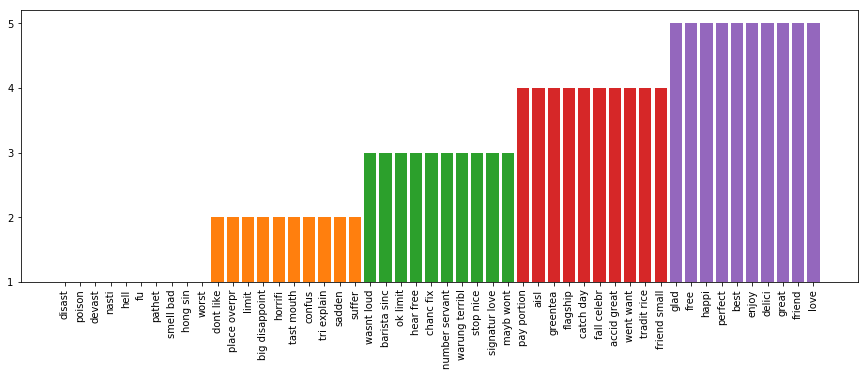

In [101]:
# create plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    plt.bar((feature_names[top10]), label)
    plt.xticks(rotation=90)